# "Analyzing Swiggy - Bangalore Outlet"

**Made By: ASHISH SINGH**

**Internship ID: CRIN2301701**

**INTRODUCTION AND PROBLEM STATEMENT**

The online food ordering market includes foods prepared by restaurants, prepared by independent people, and 
groceries being ordered online and then picked up or delivered. The first online food ordering service, 
World Wide Waiter (now known as Waiter.com), was founded in 1995. Online food ordering is the process of ordering 
food from a website or other application. The product can be either ready-to-eat food or food that has not been specially
prepared for direct consumption.

Do ETL: Extract-Transform-Load the dataset and find for me some information from this large data. This is a form of data mining. What all information can be achieved by mining this data,would be explained in a class by the trainer
Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings.

In [1]:
#importing necessary libraries

import matplotlib.pyplot as plt 
import numpy as np 
import sklearn as sklearn
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
# importing the dataset (Swiggy)
df=pd.read_csv('Swiggy data.csv')

In [4]:
size= df.shape
print('The Number of Rows: ',size[0], ' and Number of Columns: ',size[1])

The Number of Rows:  118  and Number of Columns:  5


In [5]:
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


### PRE-PROCESSING DATASET FOR EXPLORATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


`Rating` and `Cost_for_Two` should be Floating type

In [7]:
df['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [8]:
# Data Points with rating as -- should be replaced with 0
df['Rating'].replace('--',0,inplace=True)

In [9]:
# now changing the Data Type of Rating Attribute from String to Float
df['Rating']=[float(i) for i in df['Rating']]

In [10]:
df['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [11]:
# now changing the Data Type of Cost_for_Two Attribute from String to Float
list1=[]
list2=[]
for i in df['Cost_for_Two']:
    res=i.split()
    list1.append(res[0])
    list2.append(float(res[1]))
# list2
# list1

In [12]:
df['Cost for Two']=list2
df.drop(['Cost_for_Two'],axis=1,inplace=True)

In [13]:
df

,Shop_Name,Cuisine,Location,Rating,Cost for Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150.0
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400.0
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126.0
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400.0
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450.0
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219.0
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600.0
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193.0
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200.0


In [14]:
# rechecking dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost for Two  118 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.7+ KB


we can observe that there is **NO Missing Values** in any attribute.

**Now, Separating out the values in Cuisine Attribute into multiple attributes based on the Cusines**

In [15]:
# Split cuisine column into multiple columns using one-hot encoding
cuisine_dummies = df['Cuisine'].str.get_dummies(',')

# Normalize column names by removing leading/trailing spaces
cuisine_dummies.columns = cuisine_dummies.columns.str.strip()

# Merge columns with the same names into a single column
cuisine_merged = cuisine_dummies.groupby(cuisine_dummies.columns, axis=1).sum()

# Concatenate the merged column with the original dataset
data = pd.concat([df,cuisine_merged], axis=1)

# Drop the original cuisine columns
data.drop('Cuisine', axis=1, inplace=True)

In [16]:
data.head()

,Shop_Name,Location,Rating,Cost for Two,American,Andhra,Arabian,Asian,Bakery,Beverages,...,Rajasthani,Salads,Seafood,Snacks,South Indian,Sweets,Tandoor,Thai,Thalis,Turkish
0,Kanti Sweets,"Koramangala, Koramangala",4.3,150.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Mumbai Tiffin,"Sector 5, HSR",4.4,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Sri Krishna sagar,"6th Block, Koramangala",4.1,126.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,Al Daaz,"HSR, HSR",4.4,400.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beijing Bites,"5th Block, Koramangala",4.1,450.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# updated shape
size2= data.shape
print('The Number of Rows: ',size2[0], ' and Number of Columns: ',size2[1])

The Number of Rows:  118  and Number of Columns:  52


In [18]:
data.describe()

,Rating,Cost for Two,American,Andhra,Arabian,Asian,Bakery,Beverages,Biryani,Cafe,...,Rajasthani,Salads,Seafood,Snacks,South Indian,Sweets,Tandoor,Thai,Thalis,Turkish
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,4.061864,321.008475,0.093220,0.127119,0.033898,0.025424,0.025424,0.076271,0.220339,0.016949,...,0.008475,0.016949,0.076271,0.042373,0.237288,0.016949,0.008475,0.025424,0.008475,0.016949
std,0.430845,137.286804,0.291981,0.334526,0.181739,0.158080,0.158080,0.266563,0.416243,0.129631,...,0.092057,0.129631,0.266563,0.202297,0.427235,0.129631,0.092057,0.158080,0.092057,0.129631
min,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,204.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.100000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.800000,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


------------------------------------------------

### EXPLORATORY DATA ANALYSIS (EDA) AND VISUALIZATION

**1. Cuisine Analysis**

In [19]:
# creating a sub dataframe having only cuisine columns
data2=data.iloc[:,4:]
data2.head(3)

,American,Andhra,Arabian,Asian,Bakery,Beverages,Biryani,Cafe,Chaat,Chettinad,...,Rajasthani,Salads,Seafood,Snacks,South Indian,Sweets,Tandoor,Thai,Thalis,Turkish
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# Get the cuisine columns (assuming they are already encoded using get-dummies)
cuisine_columns = [col for col in data2.columns]

# Calculate the cuisine counts
cuisine_counts = data2[cuisine_columns].sum().sort_values(ascending=False)
print (cuisine_counts)


North Indian      47
Chinese           42
South Indian      28
Biryani           26
Desserts          22
Fast Food         20
Andhra            15
American          11
Seafood            9
Beverages          9
Mughlai            7
Indian             6
Kerala             6
Snacks             5
Pizzas             5
Hyderabadi         5
Italian            5
Healthy Food       4
Arabian            4
Mexican            3
Ice Cream          3
Thai               3
Asian              3
Bakery             3
Continental        3
Punjabi            2
Portuguese         2
Salads             2
Pan-Asian          2
Sweets             2
Kebabs             2
Home Food          2
Jain               2
Cafe               2
Chaat              2
Chettinad          2
Grill              2
Turkish            2
Juices             2
Rajasthani         1
Oriental           1
Combo              1
Lebanese           1
Pastas             1
Tandoor            1
Mediterranean      1
Thalis             1
Middle Easter

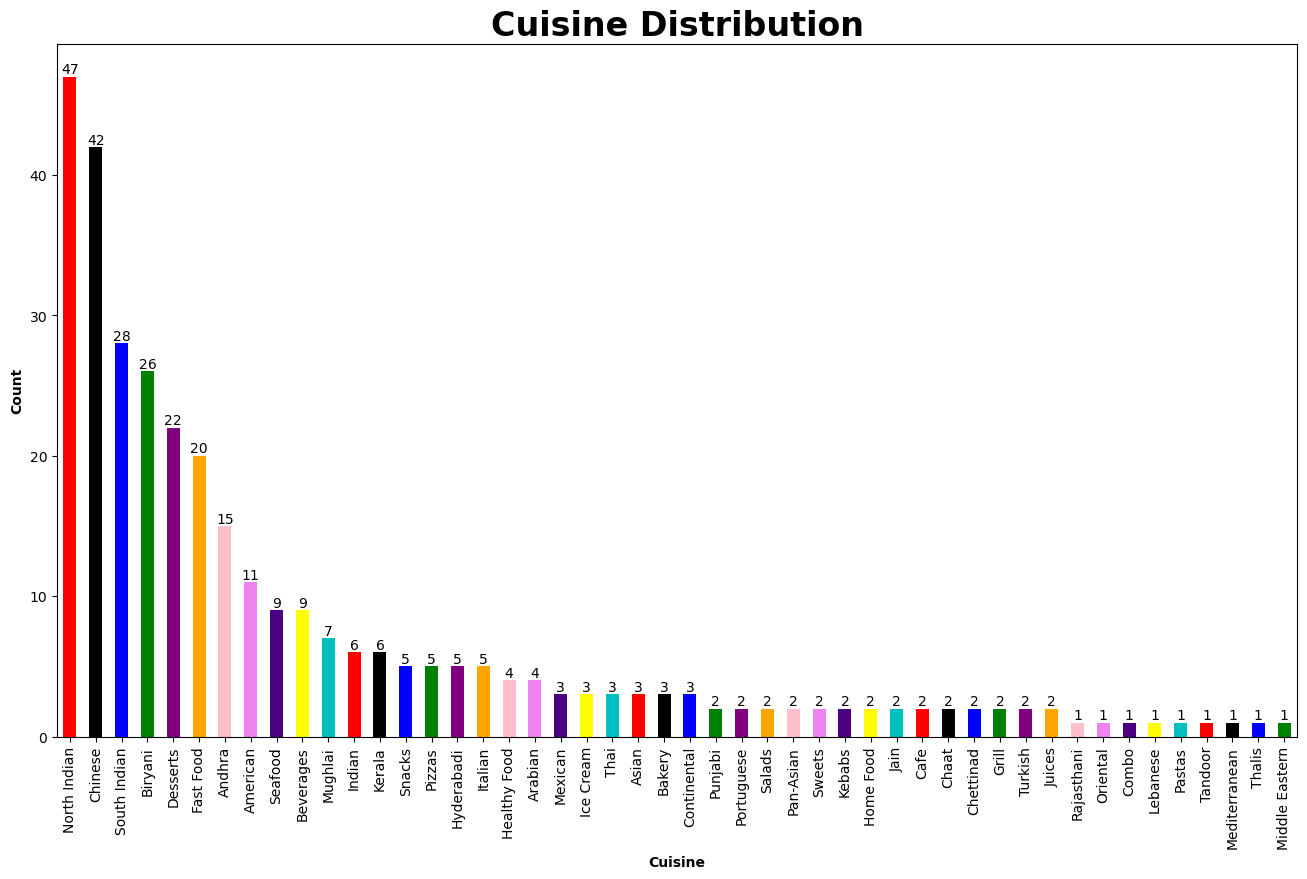

In [21]:
# Plot the cuisine distribution
cd=['red','black','blue','green','purple','orange','pink','violet','indigo','yellow','c']
plt.figure(figsize=(16, 9))
cuisine_counts.plot(kind='bar',color=cd)
plt.xlabel('Cuisine',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Cuisine Distribution',fontweight='bold',size=24)
plt.xticks(rotation=90)
for i, v in enumerate(cuisine_counts.values):
    plt.annotate(str(v), xy=(i, v),ha='center',color='black',va='bottom')
plt.show()

From the Above graph we can observe that **Top 3 Cuisines in Bangalore (Swiggy Network)** are:
    
    1. North Indian
    2. Chinese
    3. South Indian
    
and the least available Cuisines are:
    
    1. Rajasthani
    2. Oriental      
    3. Combo         
    4. Lebanese      
    5. Pastas        
    6. Tandoor       
    7. Mediterranean 
    8. Thalis        
    9. Middle Eastern

**2. Location Analysis**

In [22]:
location_counts = data['Location'].value_counts()

In [23]:
location_counts

BTM, BTM                                                             13
Koramangala, Koramangala                                             12
5th Block, Koramangala                                               10
HSR, HSR                                                              8
7th Block, Koramangala                                                5
                                                                     ..
1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala     1
Mico Layout, BTM                                                      1
Sector 5, HSR                                                         1
Intermediate Ring Road, Koramangala                                   1
5th block Koramangala, Koramangala                                    1
Name: Location, Length: 65, dtype: int64

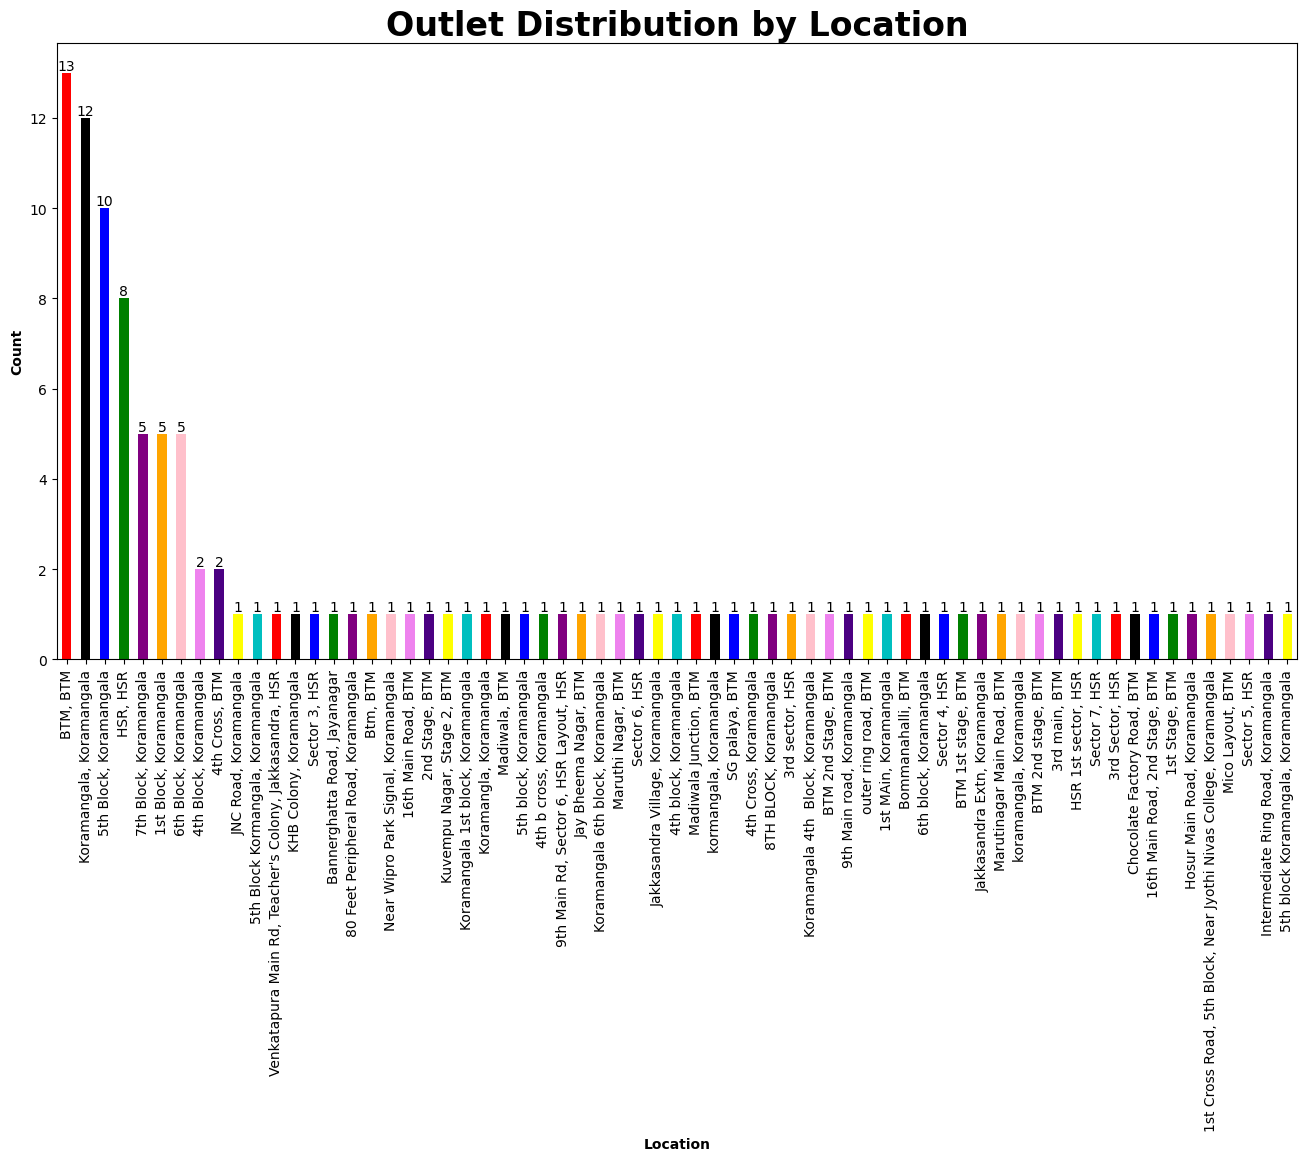

In [24]:
# Plotting the location distribution
plt.figure(figsize=(16, 8))
location_counts.plot(kind='bar',color=cd)
plt.xlabel('Location', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Outlet Distribution by Location', fontweight='bold',size=24)
plt.xticks(rotation=90)
for i, v in enumerate(location_counts.values):
    plt.annotate(str(v), xy=(i, v),ha='center',color='black',va='bottom')
plt.show()

**Only 9 Locations have more than 1 Outlets, rest 56 Locations have exactly 1 Outlet.**

Top 3 Locations with most number of outlets:

        1. BTM, BTM --> 13
        2. Koramangala, Koramangala --> 12
        3. 5th Block, Koramangala --> 10

**3. Rating Analysis**

In [25]:
rating_counts = data['Rating'].value_counts()
rating_counts

4.1    30
4.3    23
4.0    21
3.9    13
4.2    10
3.7     6
4.4     4
3.8     4
3.6     2
4.6     2
4.8     1
4.5     1
0.0     1
Name: Rating, dtype: int64

In [26]:
average_rating=data['Rating'].mean()

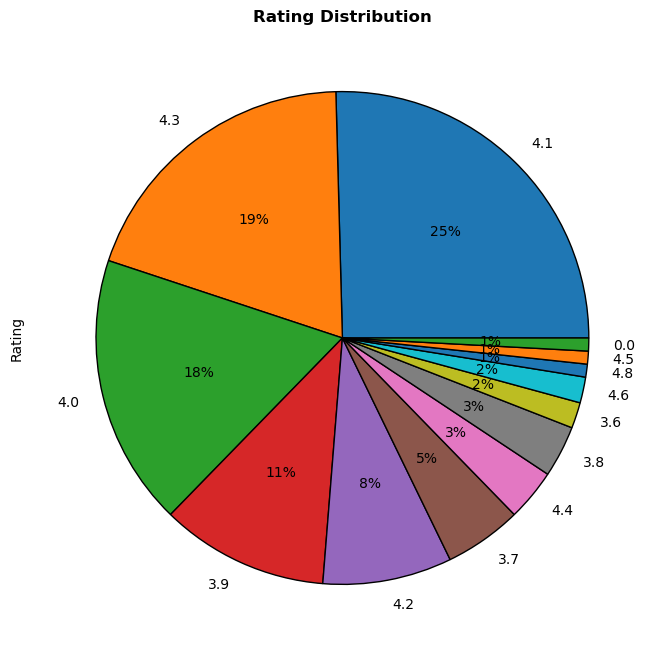

In [27]:
# Plotting the rating distribution
rating_counts.plot.pie(subplots=True, figsize=(14, 8), wedgeprops={"edgecolor":"0",'linewidth': 1, 'antialiased': True},
autopct='%1.0f%%')
plt.title('Rating Distribution',fontweight=600)
plt.show()


In [28]:
# Additional statistics
print('Average Rating:', average_rating)
print('Maximum Rating:', data['Rating'].max())
print('Minimum Rating:', data['Rating'].min())

Average Rating: 4.061864406779662
Maximum Rating: 4.8
Minimum Rating: 0.0


**4. Cost Analysis**

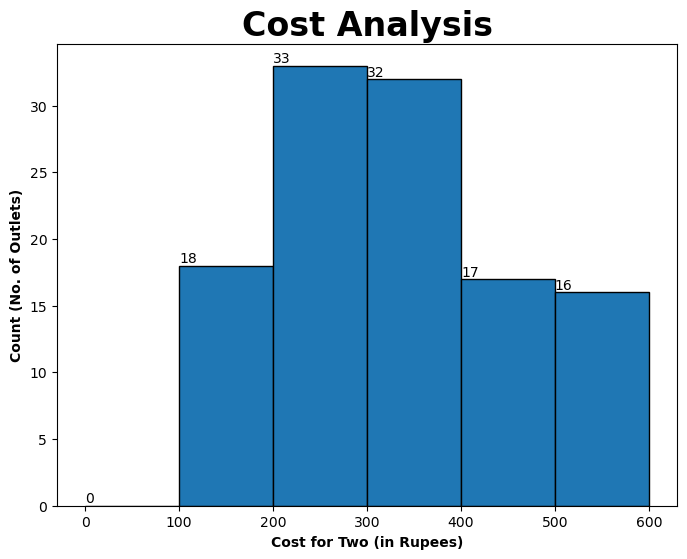

In [29]:
# Cost Analysis
plt.figure(figsize=(8, 6))
bins1=[0,100,200,300,400,500,600]
n, bins, patches = plt.hist(data['Cost for Two'], bins=bins1, edgecolor='k')
plt.xlabel('Cost for Two (in Rupees)', fontweight='bold')
plt.ylabel('Count (No. of Outlets)',fontweight='bold')
plt.title('Cost Analysis',fontweight='bold',size=24)
for i in range(len(patches)):
    plt.text(bins[i], n[i], int(n[i]), ha='left',va='bottom',wrap=True)

plt.show()


In [30]:
# Additional statistics

print('Maximum Cost:', data['Cost for Two'].max())
print('Minimum Cost:', data['Cost for Two'].min())
print('Average Cost:', data['Cost for Two'].mean())

Maximum Cost: 800.0
Minimum Cost: 100.0
Average Cost: 321.00847457627117


## THANK YOU